# Exercise 3: Use a learning rate for updating the weights and bias unit

## 1) Installing Libraries

In [402]:
# !conda install numpy pandas matplotlib --yes

In [403]:
# !conda install watermark

In [404]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.20.0

numpy     : 1.26.4
pandas    : 2.2.3
matplotlib: 3.10.0


## 2) Loading the Dataset

In [405]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [406]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [407]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [408]:
X_train.shape

(20, 2)

In [409]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [410]:
y_train.shape

(20,)

In [411]:
import numpy as np

np.bincount(y_train)

array([10, 10])

## 3) Visualizing the dataset

In [412]:
%matplotlib inline
import matplotlib.pyplot as plt

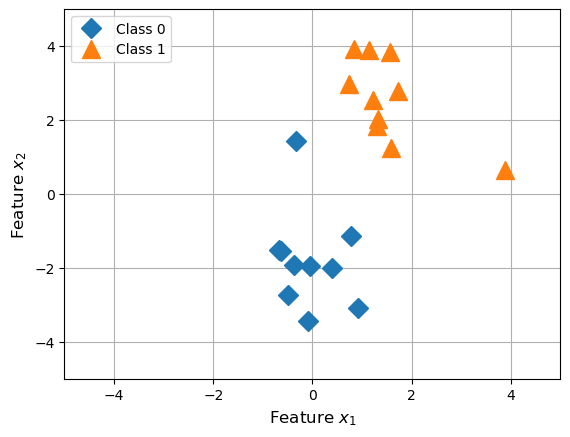

In [413]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 4) Implementing the Perceptron

In [414]:
import random

random.uniform(-0.5, 0.5)

-0.16620360537104473

# <font color='red'>Exercise 3.1</font>

<font color='red'>Modify the Perceptron class below such that it uses a so-called *learning rate* for updating the weights and bias unit. The learning rate, let's call it `alpha` is a positive float that scales the weight update. I.e., in the code below, multiply the bias and weight update by a variable `alpha` which defaults to 1.0. (Hint: don't forget to modify the `__init__` method such that it accepts different values for `alpha`.</font>

In [415]:
class Perceptron:
    def __init__(self, num_features,alpha=1):
        random.seed(123) 
        self.num_features = num_features
        # initializes the weights unit to random number
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        # initializes the bias unit to random number
        self.bias = random.uniform(-0.5, 0.5)
        self.alpha = alpha  # Learning rate

    def forward(self, x):
        weighted_sum_z = self.bias
        for i in range(self.num_features):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction
        # adding alpha here
        self.bias += self.alpha * error
        for i in range(self.num_features):
            self.weights[i] += self.alpha * error * x[i]

        return error

In [416]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch {epoch+1}: {error_count} errors")

# <font color='red'>Exercise 3.2</font>

<font color='red'>Now, modify the code below to train the perceptron with a learning rate of `alpha=1.0`. Since we are multiplying the weight and bias update by 1.0, we should get exactly the same results as in the original code.</font>

In [417]:
ppn = Perceptron(num_features=2, alpha=0.5)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=5)

#Exercise 3.2 + #Exercise 3.3: the perceptron stays the same because the learning rate is 1

#Exercise 3.4: the outcome is the same for learning rate = 1 and 0.5.

#Exercise 3.5: the outcome changes from "Epoch 1: 4 errors, Epoch 2: 1 errors" to "Epoch 1: 2 errors, Epoch 2: 2 errors" which is pretty interesting. It still takes 2 Epoch but the numbers of errors it got in each Epoch are different.

Epoch 1: 2 errors
Epoch 2: 2 errors
Epoch 3: 0 errors
Epoch 4: 0 errors
Epoch 5: 0 errors


# <font color='red'>Exercise 3.3</font>

<font color='red'>What do you observe? Does the perceptron train better or worse?</font>

# <font color='red'>Exercise 3.4</font>

<font color='red'>
Now, change the learning rate from `alpha=1.0` to `alpha=0.5` and train the perceptron again. What do you observe?
</font>


# <font color='red'>Exercise 3.5</font>

<font color='red'>
Next, update the Perceptron code with small random weights (solution of exercise 2). 
</font>

<br>

<font color='red'>
Then, train the perceptron again with a learning rate of 1.0 and 0.5 and compare the results.
</font>

## 5) Evaluating the results

In [418]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [419]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [420]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


## 6) Optional: Visualizing the Decision Boundary

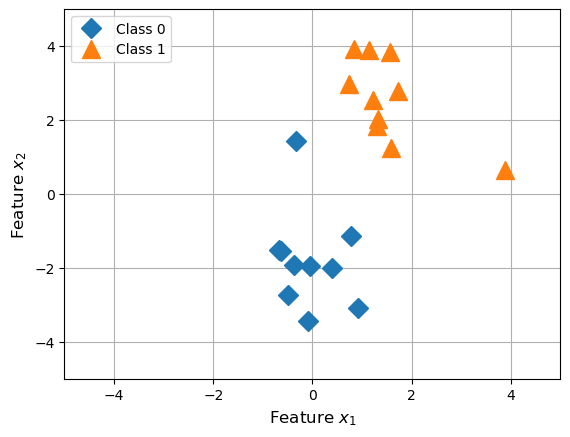

In [421]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [422]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

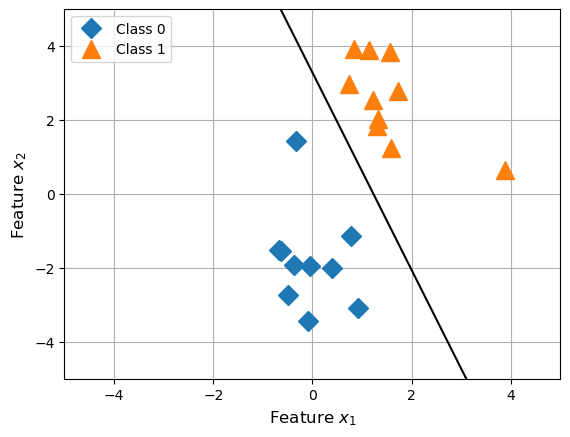

In [423]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()